# ECS 171 - Homework 2
## WHERE  DID  THE  BAKER  GO? [100 PT]
In this exercise, you will build a classifier that can find the localization site of a protein in yeast,based on 8 attributes (features). You will use the “Yeast” dataset (“yeast.data” file; 1484 proteins,8 features, 10 different classes; no missing data) that is available in the UCI Machine LearningRepository:<br /><br />
https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/

## Q1
Construct a 3-layer artificial neural network (ANN) and specifically a feed-forward multi-layer perceptron to perform multi-class classification.   The hidden layer should have 3 nodes.   Split your data into a random set of 70% of the samples as the training set and the rest 30% as the testing set.  For training, use stochastic gradient descent with back-propagation.  Please note that you will never train with the testing set; the ANN will only take into account the training set for updating the weights.  For the most pupular class "CYT",  provide  2  plots:  (I)  weight  values  per  iteration  for  the  last  layer  (3  weights  and bias), (II) training and test error per iteration. [30pt]

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columns = ["Sequence Name", "mcg", "gvm", "alm", "mit", "erl", "pox", "vac", "nuc", "class"]
classes = ["CYT", "NUC", "MIT", "ME3", "ME2", "ME1", "EXC", "VAC", "POX", "ERL"]

# load and process the data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data", names=columns, delim_whitespace=True)
df = df.drop("Sequence Name", 1)
# replace classes with a number from 0-9 that corresponds to each class
for i in range(10):   
    df = df.replace(to_replace=classes[i], value=i)
# data is randomized to get a more consistent distribution for training and test data
df_randomized = df.sample(frac=1).reset_index(drop=True)
# 70% data for training set and 30% data for testing set
training_set = df_randomized.loc[0:int(df.shape[0] * 0.7)]
testing_set = df_randomized.loc[int(df.shape[0] * 0.7 + 1):df.shape[0] - 1]


In [33]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

features = ["mcg", "gvm", "alm", "mit", "erl", "pox", "vac", "nuc"]

# prepare training set and test set; one hot encoding for y values
y_train = np.array(pd.DataFrame(training_set["class"]))
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = np.array(pd.DataFrame(testing_set["class"]))
y_test = keras.utils.to_categorical(y_test, num_classes=10)
x_train = np.array(pd.DataFrame(training_set[features]))
x_test = np.array(pd.DataFrame(testing_set[features]))

In [34]:
# callback function to obtain weights and bias for plotting
class My_Callback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.biases = []
        self.w1 = []
        self.w2 = []
        self.w3 = []
 
    def on_epoch_end(self, epoch, logs={}):
        biases = model.layers[2].get_weights()[1][0]
        w1 = model.layers[2].get_weights()[0][0][0]
        w2 = model.layers[2].get_weights()[0][1][0]
        w3 = model.layers[2].get_weights()[0][2][0]
        self.biases.append(biases)
        self.w1.append(w1)
        self.w2.append(w2)
        self.w3.append(w3)
        
 

In [35]:
# Define model of neural network
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim=8))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

num_epochs = 1000
my_callback = My_Callback()

# train network
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[my_callback], verbose=0, epochs=num_epochs, batch_size=1)    



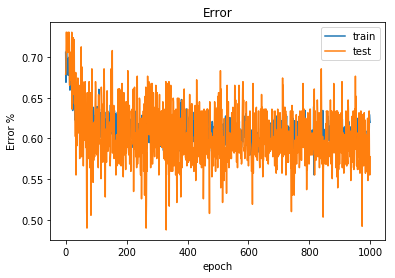

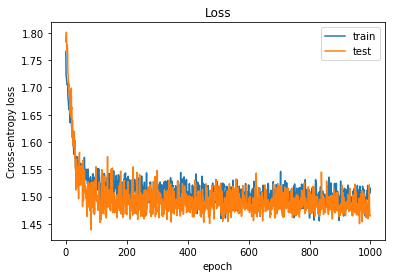

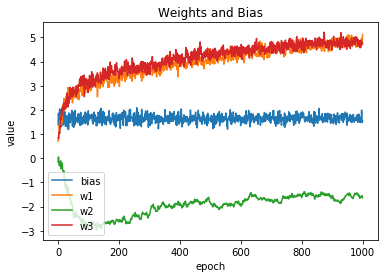

In [36]:
# For error, it's for the whole data set rather than just CYT
# For weights and biases, it's only for CYT
error = 1 - np.array(history.history['acc'])
error_val = 1 - np.array(history.history['val_acc'])
# plot error
train_acc, = plt.plot(error, label='train')
test_acc, = plt.plot(error_val, label='test')
plt.title('Error')
plt.xlabel('epoch')
plt.ylabel('Error %')
plt.legend(handles=[train_acc, test_acc])
plt.show()
# plot weights and bias for CYT
bias_label, = plt.plot(my_callback.biases, label='bias')
w1_label, = plt.plot(my_callback.w1, label='w1')
w2_label, = plt.plot(my_callback.w2, label='w2')
w3_label, = plt.plot(my_callback.w3, label='w3')
plt.title('Weights and Bias')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(handles=[bias_label, w1_label, w2_label, w3_label])
plt.show()

## Q2
Now re-train the ANN with all your data (all 1484 samples). What is your training error? Provide the final activation function formula for class "CYT" after training. [10pt]

In [173]:
# train with all data
y_train_all = np.array(pd.DataFrame(df_randomized["class"]))
y_train_all = keras.utils.to_categorical(y_train_all, num_classes=10)
x_train_all = np.array(pd.DataFrame(df_randomized[features]))

In [174]:
# Define model of neural network
model_2 = Sequential()
model_2.add(Dense(3, activation='sigmoid', input_dim=8))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_2.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

num_epochs_2 = 1000

history = model_2.fit(x_train_all, y_train_all, verbose=1, epochs=num_epochs_2, batch_size=1)    
score = model_2.evaluate(x_train_all, y_train_all, batch_size=y_train_all.shape[0], verbose=0)
print(1 - score[1])


Epoch 1/1000
1484/1484 [==============================] - 3s - loss: 1.7723 - acc: 0.2958     
Epoch 2/1000
1484/1484 [==============================] - 2s - loss: 1.7510 - acc: 0.2810     
Epoch 3/1000
1484/1484 [==============================] - 2s - loss: 1.7330 - acc: 0.3106     
Epoch 4/1000
1484/1484 [==============================] - 2s - loss: 1.7195 - acc: 0.2918     - ETA: 0s - loss: 1.7231 - acc: 0.28
Epoch 5/1000
1484/1484 [==============================] - 2s - loss: 1.7035 - acc: 0.3026     
Epoch 6/1000
1484/1484 [==============================] - 2s - loss: 1.6971 - acc: 0.2810     
Epoch 7/1000
1484/1484 [==============================] - 3s - loss: 1.6834 - acc: 0.3140     
Epoch 8/1000
1484/1484 [==============================] - 2s - loss: 1.6618 - acc: 0.3288     
Epoch 9/1000
1484/1484 [==============================] - 2s - loss: 1.6646 - acc: 0.3181     
Epoch 10/1000
1484/1484 [==============================] - 2s - loss: 1.6509 - acc: 0.3356     
Epoch 11/1000

1484/1484 [==============================] - 2s - loss: 1.5277 - acc: 0.3841     
Epoch 85/1000
1484/1484 [==============================] - 2s - loss: 1.5591 - acc: 0.3612     
Epoch 86/1000
1484/1484 [==============================] - 2s - loss: 1.5740 - acc: 0.3376     
Epoch 87/1000
1484/1484 [==============================] - 3s - loss: 1.5623 - acc: 0.3504     
Epoch 88/1000
1484/1484 [==============================] - 4s - loss: 1.5416 - acc: 0.3639     
Epoch 89/1000
1484/1484 [==============================] - 4s - loss: 1.5568 - acc: 0.3780     
Epoch 90/1000
1484/1484 [==============================] - 4s - loss: 1.5573 - acc: 0.3443     
Epoch 91/1000
1484/1484 [==============================] - 3s - loss: 1.5264 - acc: 0.3794     
Epoch 92/1000
1484/1484 [==============================] - 4s - loss: 1.5496 - acc: 0.3821     
Epoch 93/1000
1484/1484 [==============================] - 4s - loss: 1.5181 - acc: 0.3706     
Epoch 94/1000
1484/1484 [=============================

1484/1484 [==============================] - 3s - loss: 1.5381 - acc: 0.3639     
Epoch 169/1000
1484/1484 [==============================] - 2s - loss: 1.5523 - acc: 0.3457     
Epoch 170/1000
1484/1484 [==============================] - 2s - loss: 1.5482 - acc: 0.3396     
Epoch 171/1000
1484/1484 [==============================] - 2s - loss: 1.5382 - acc: 0.3646     
Epoch 172/1000
1484/1484 [==============================] - 2s - loss: 1.5327 - acc: 0.3868     -
Epoch 173/1000
1484/1484 [==============================] - 2s - loss: 1.5606 - acc: 0.3747     
Epoch 174/1000
1484/1484 [==============================] - 2s - loss: 1.5354 - acc: 0.3666     
Epoch 175/1000
1484/1484 [==============================] - 2s - loss: 1.5487 - acc: 0.3673     
Epoch 176/1000
1484/1484 [==============================] - 2s - loss: 1.5423 - acc: 0.3827     
Epoch 177/1000
1484/1484 [==============================] - 2s - loss: 1.5418 - acc: 0.3868     
Epoch 178/1000
1484/1484 [==================

1484/1484 [==============================] - 4s - loss: 1.5241 - acc: 0.3437     
Epoch 252/1000
1484/1484 [==============================] - 2s - loss: 1.5391 - acc: 0.3740     
Epoch 253/1000
1484/1484 [==============================] - 2s - loss: 1.5282 - acc: 0.3841     
Epoch 254/1000
1484/1484 [==============================] - 2s - loss: 1.5485 - acc: 0.3753     
Epoch 255/1000
1484/1484 [==============================] - 3s - loss: 1.5069 - acc: 0.3740     
Epoch 256/1000
1484/1484 [==============================] - 3s - loss: 1.5384 - acc: 0.3868     
Epoch 257/1000
1484/1484 [==============================] - 3s - loss: 1.5352 - acc: 0.3902     
Epoch 258/1000
1484/1484 [==============================] - 4s - loss: 1.5174 - acc: 0.3720     
Epoch 259/1000
1484/1484 [==============================] - 3s - loss: 1.5353 - acc: 0.3693     
Epoch 260/1000
1484/1484 [==============================] - 3s - loss: 1.5390 - acc: 0.3740     
Epoch 261/1000
1484/1484 [===================

1484/1484 [==============================] - 2s - loss: 1.5359 - acc: 0.3558     
Epoch 336/1000
1484/1484 [==============================] - 2s - loss: 1.5330 - acc: 0.3720     
Epoch 337/1000
1484/1484 [==============================] - 2s - loss: 1.5194 - acc: 0.3666     
Epoch 338/1000
1484/1484 [==============================] - 2s - loss: 1.5179 - acc: 0.3895     
Epoch 339/1000
1484/1484 [==============================] - 4s - loss: 1.5287 - acc: 0.3693     
Epoch 340/1000
1484/1484 [==============================] - 4s - loss: 1.5165 - acc: 0.3699     
Epoch 341/1000
1484/1484 [==============================] - 4s - loss: 1.5613 - acc: 0.3578     
Epoch 342/1000
1484/1484 [==============================] - 3s - loss: 1.5245 - acc: 0.3841     
Epoch 343/1000
1484/1484 [==============================] - 4s - loss: 1.5021 - acc: 0.3814     
Epoch 344/1000
1484/1484 [==============================] - 4s - loss: 1.5058 - acc: 0.3935     
Epoch 345/1000
1484/1484 [===================

1484/1484 [==============================] - 4s - loss: 1.5353 - acc: 0.3713     
Epoch 420/1000
1484/1484 [==============================] - 4s - loss: 1.5227 - acc: 0.3625     
Epoch 421/1000
1484/1484 [==============================] - 3s - loss: 1.5026 - acc: 0.3902     
Epoch 422/1000
1484/1484 [==============================] - 2s - loss: 1.5411 - acc: 0.3497     
Epoch 423/1000
1484/1484 [==============================] - 2s - loss: 1.5226 - acc: 0.3706     
Epoch 424/1000
1484/1484 [==============================] - 2s - loss: 1.5157 - acc: 0.3767     
Epoch 425/1000
1484/1484 [==============================] - 2s - loss: 1.5374 - acc: 0.3639     - ETA: 1s - l
Epoch 426/1000
1484/1484 [==============================] - 2s - loss: 1.5143 - acc: 0.3713     
Epoch 427/1000
1484/1484 [==============================] - 2s - loss: 1.5062 - acc: 0.3733     
Epoch 428/1000
1484/1484 [==============================] - 2s - loss: 1.5396 - acc: 0.3794     
Epoch 429/1000
1484/1484 [======

1484/1484 [==============================] - 2s - loss: 1.5104 - acc: 0.3733     
Epoch 503/1000
1484/1484 [==============================] - 2s - loss: 1.4965 - acc: 0.3908     
Epoch 504/1000
1484/1484 [==============================] - 2s - loss: 1.5404 - acc: 0.3450     
Epoch 505/1000
1484/1484 [==============================] - 2s - loss: 1.5138 - acc: 0.3834     
Epoch 506/1000
1484/1484 [==============================] - 3s - loss: 1.5022 - acc: 0.3794     
Epoch 507/1000
1484/1484 [==============================] - 4s - loss: 1.5124 - acc: 0.3733     
Epoch 508/1000
1484/1484 [==============================] - 4s - loss: 1.5220 - acc: 0.3726     
Epoch 509/1000
1484/1484 [==============================] - 4s - loss: 1.5213 - acc: 0.3639     
Epoch 510/1000
1484/1484 [==============================] - 4s - loss: 1.5001 - acc: 0.3592     
Epoch 511/1000
1484/1484 [==============================] - 4s - loss: 1.5243 - acc: 0.3720     
Epoch 512/1000
1484/1484 [===================

1484/1484 [==============================] - 4s - loss: 1.5212 - acc: 0.3753     
Epoch 587/1000
1484/1484 [==============================] - 3s - loss: 1.5167 - acc: 0.3841     
Epoch 588/1000
1484/1484 [==============================] - 2s - loss: 1.5180 - acc: 0.3713     
Epoch 589/1000
1484/1484 [==============================] - 2s - loss: 1.4999 - acc: 0.3699     
Epoch 590/1000
1484/1484 [==============================] - 2s - loss: 1.5189 - acc: 0.3801     
Epoch 591/1000
1484/1484 [==============================] - 3s - loss: 1.4911 - acc: 0.3767     
Epoch 592/1000
1484/1484 [==============================] - 4s - loss: 1.5043 - acc: 0.3726     
Epoch 593/1000
1484/1484 [==============================] - 3s - loss: 1.5281 - acc: 0.3652     
Epoch 594/1000
1484/1484 [==============================] - 3s - loss: 1.5033 - acc: 0.3767     
Epoch 595/1000
1484/1484 [==============================] - 4s - loss: 1.5256 - acc: 0.3673     
Epoch 596/1000
1484/1484 [===================

1484/1484 [==============================] - 3s - loss: 1.5360 - acc: 0.3625     
Epoch 670/1000
1484/1484 [==============================] - 3s - loss: 1.5219 - acc: 0.3646     
Epoch 671/1000
1484/1484 [==============================] - 3s - loss: 1.5110 - acc: 0.3686     
Epoch 672/1000
1484/1484 [==============================] - 4s - loss: 1.5041 - acc: 0.3834     
Epoch 673/1000
1484/1484 [==============================] - 3s - loss: 1.5043 - acc: 0.3827     
Epoch 674/1000
1484/1484 [==============================] - 3s - loss: 1.5122 - acc: 0.3706     
Epoch 675/1000
1484/1484 [==============================] - 3s - loss: 1.5370 - acc: 0.3410     
Epoch 676/1000
1484/1484 [==============================] - 3s - loss: 1.4963 - acc: 0.3686     
Epoch 677/1000
1484/1484 [==============================] - 3s - loss: 1.5022 - acc: 0.3646     
Epoch 678/1000
1484/1484 [==============================] - 2s - loss: 1.5067 - acc: 0.3888     
Epoch 679/1000
1484/1484 [===================

1484/1484 [==============================] - 4s - loss: 1.4876 - acc: 0.3807     
Epoch 754/1000
1484/1484 [==============================] - 3s - loss: 1.5131 - acc: 0.3720     
Epoch 755/1000
1484/1484 [==============================] - 2s - loss: 1.5243 - acc: 0.3807     
Epoch 756/1000
1484/1484 [==============================] - 2s - loss: 1.5088 - acc: 0.3881     
Epoch 757/1000
1484/1484 [==============================] - 2s - loss: 1.5375 - acc: 0.3706     
Epoch 758/1000
1484/1484 [==============================] - 2s - loss: 1.4929 - acc: 0.3875     
Epoch 759/1000
1484/1484 [==============================] - 2s - loss: 1.5309 - acc: 0.3619     
Epoch 760/1000
1484/1484 [==============================] - 3s - loss: 1.5221 - acc: 0.3794     
Epoch 761/1000
1484/1484 [==============================] - 3s - loss: 1.5077 - acc: 0.3827     
Epoch 762/1000
1484/1484 [==============================] - 4s - loss: 1.5087 - acc: 0.3679     
Epoch 763/1000
1484/1484 [===================

1484/1484 [==============================] - 4s - loss: 1.5056 - acc: 0.3780     
Epoch 838/1000
1484/1484 [==============================] - 4s - loss: 1.5065 - acc: 0.3767     
Epoch 839/1000
1484/1484 [==============================] - 3s - loss: 1.5204 - acc: 0.3747     
Epoch 840/1000
1484/1484 [==============================] - 3s - loss: 1.5170 - acc: 0.3693     
Epoch 841/1000
1484/1484 [==============================] - 4s - loss: 1.5201 - acc: 0.3693     
Epoch 842/1000
1484/1484 [==============================] - 5s - loss: 1.5335 - acc: 0.3612     
Epoch 843/1000
1484/1484 [==============================] - 4s - loss: 1.5347 - acc: 0.3585     
Epoch 844/1000
1484/1484 [==============================] - 4s - loss: 1.5344 - acc: 0.3652     
Epoch 845/1000
1484/1484 [==============================] - 4s - loss: 1.5152 - acc: 0.3787     
Epoch 846/1000
1484/1484 [==============================] - 4s - loss: 1.5285 - acc: 0.3706     
Epoch 847/1000
1484/1484 [===================

1484/1484 [==============================] - 4s - loss: 1.4962 - acc: 0.3922     
Epoch 922/1000
1484/1484 [==============================] - 4s - loss: 1.5281 - acc: 0.3726     
Epoch 923/1000
1484/1484 [==============================] - 4s - loss: 1.5103 - acc: 0.3720     
Epoch 924/1000
1484/1484 [==============================] - 4s - loss: 1.5159 - acc: 0.3706     
Epoch 925/1000
1484/1484 [==============================] - 4s - loss: 1.5117 - acc: 0.3902     
Epoch 926/1000
1484/1484 [==============================] - 4s - loss: 1.4860 - acc: 0.3922     
Epoch 927/1000
1484/1484 [==============================] - 4s - loss: 1.4974 - acc: 0.3720     
Epoch 928/1000
1484/1484 [==============================] - 4s - loss: 1.5303 - acc: 0.3518     
Epoch 929/1000
1484/1484 [==============================] - 4s - loss: 1.5196 - acc: 0.3531     
Epoch 930/1000
1484/1484 [==============================] - 4s - loss: 1.5091 - acc: 0.3814     - ETA: 0s - loss: 1.5128 - acc: 0.
Epoch 931/1

## Q3
For the ANN that you have built (3 layers, 1 hidden layer, 3 hidden nodes) calculate the first round of weight update with back-propagation with paper and pencil for all weights but for only the first sample.  Confirm that the numbers that you calculated are the same with those produced by the code and provide both your calculations and the code out-put.  Provide both calculations made by hand (scanned image is fine) and corresponding output from the program that shows that both are in agreement. [30pt]

In [169]:
# new callback function to store weights and bias before and after one gradient descent update
class My_Callback_Q3(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.l1bias = []
        self.l2bias = []
        self.l1w = []
        self.l2w = []
 
    # store weights before GD
    def on_batch_begin(self, batch, logs={}):
        l1bias = self.model.layers[0].get_weights()[1]
        l1w = self.model.layers[0].get_weights()[0]
        l2bias = self.model.layers[1].get_weights()[1]
        l2w = self.model.layers[1].get_weights()[0]
        self.l1bias.append(l1bias)
        self.l1w.append(l1w)
        self.l2bias.append(l2bias)
        self.l2w.append(l2w)
 
    # store weights after GD
    def on_batch_end(self, batch, logs={}):
        l1bias = self.model.layers[0].get_weights()[1]
        l1w = self.model.layers[0].get_weights()[0]
        l2bias = self.model.layers[1].get_weights()[1]
        l2w = self.model.layers[1].get_weights()[0]
        self.l1bias.append(l1bias)
        self.l1w.append(l1w)
        self.l2bias.append(l2bias)
        self.l2w.append(l2w)
        
x_sample = x_train[0].reshape(1, 8)
y_sample = y_train[0].reshape(1, 10)

In [170]:
# Define model of neural network
model_3 = Sequential()
model_3.add(Dense(3, activation='sigmoid', input_dim=8))
model_3.add(Dense(10, activation='sigmoid'))

sgd = SGD(lr=0.01)
model_3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

num_epochs = 1
my_callback_Q3 = My_Callback_Q3()

history = model_3.fit(x_sample, y_sample, callbacks=[my_callback_Q3], verbose=1, epochs=num_epochs, batch_size=1)    


Epoch 1/1
1/1 [==============================] - 0s - loss: 2.1887 - acc: 0.0000e+00


In [176]:
# initial values before gradient descent
X = x_sample.T
Y = y_sample.T
b1 = my_callback_Q3.l1bias[0].reshape(3, 1)
b2 = my_callback_Q3.l2bias[0].reshape(10, 1)
w1 = my_callback_Q3.l1w[0].T
w2 = my_callback_Q3.l2w[0].T

# values after gradient descent with keras
b1_after = my_callback_Q3.l1bias[1].reshape(3, 1)
b2_after = my_callback_Q3.l2bias[1].reshape(10, 1)
w1_after = my_callback_Q3.l1w[1].T
w2_after = my_callback_Q3.l2w[1].T

# I will manually execute gradient descent, then compare the difference between my values and keras values

# Forward pass
z1 = np.dot(w1, X) + b1
a1 = 1 / (1 + np.exp(-z1))
z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

# Backpropagation
dz2 = a2 - Y
dw2 = np.dot(dz2, a1.T)
db2 = dz2
dz1 = np.dot(w2.T, dz2) * (a1 * (1-a1))
dw1 = np.dot(dz1, X.T)
db1 = dz1

# Gradient descent
w1 = w1 - 0.01 * dw1
w2 = w2 - 0.01 * dw2
b1 = b1 - 0.01 * db1
b2 = b2 - 0.01 * db2

# My values
print(w1)
print(w2)
print(b1)
print(b2)
# keras values
print(w1_after)
print(w2_after)
print(b1_after)
print(b2_after)
# differences
print(w1 - w1_after)
print(w2 - w2_after)
print(b1 - b1_after)
print(b2 - b2_after)


[[ 0.67811859 -0.14960622 -0.64784516  0.41809467  0.11151346  0.28291029
  -0.4496897  -0.41054997]
 [-0.14657533  0.42386738 -0.16817758  0.15312098 -0.67414042  0.54192394
  -0.06316818 -0.20181173]
 [ 0.45847673 -0.09419264  0.3840241  -0.16693023 -0.1856012  -0.1647408
   0.56241256 -0.57499275]]
[[ 0.00992303 -0.34705424  0.45786721]
 [-0.23040379  0.20313021 -0.14386142]
 [ 0.19479067  0.33041922 -0.53591323]
 [ 0.46285357  0.63425502 -0.27451311]
 [ 0.18832358 -0.24825921 -0.26220822]
 [-0.08444584  0.5957568  -0.03700102]
 [ 0.06468397 -0.21673113 -0.3223974 ]
 [-0.6108867   0.67674021 -0.52079222]
 [-0.21610719  0.12807139  0.04319534]
 [ 0.07695607 -0.39976691 -0.56660653]]
[[  3.39413452e-06]
 [ -2.64006509e-03]
 [  3.20524540e-03]]
[[ 0.00463147]
 [-0.00470189]
 [-0.00474816]
 [-0.0057965 ]
 [-0.00458309]
 [-0.00545   ]
 [-0.00436796]
 [-0.00412251]
 [-0.00493712]
 [-0.00383233]]
[[ 0.67813414 -0.14959823 -0.64783156  0.41810289  0.11152427  0.28291029
  -0.44968104 -0.410

## Q4
Increase the number of hidden layers from 1 to 2 and then to 3. Then increase the number of hidden nodes per layer from 3 to 6,  then to 9 and finally to 12.   Create a 3x4 matrix with the number of hidden layers as rows and the number of hidden nodes per layer as columns, with each element (cell) of the matrix representing the testing set error for that specific combination of layers/nodes.  What is the optimal configuration?  What you find the relationship between these attributes (number of layers, number of nodes) and the generalization error (i.e. error in testing data) to be? [25pt]

In [12]:
# function to train model with flexible parameters
def train_model(num_hidden_layers, num_hidden_nodes, num_epochs, bat_size):
    if (num_hidden_layers < 1):
        print("Please enter a number greater than 1 for the number of hidden layers")
        return null
    
    model = Sequential()
    model.add(Dense(num_hidden_nodes, activation='sigmoid', input_dim=8))
    model.add(Dropout(0.5))
    for i in range(num_hidden_layers - 1):
        model.add(Dense(num_hidden_nodes, activation='sigmoid'))
        model.add(Dropout(0.5))        
    model.add(Dense(10, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

    model.fit(x_train, y_train, verbose=0, epochs=num_epochs, batch_size=bat_size) 
    return model


In [13]:
testing_set_error = np.zeros((3, 4))

# loop over number of hidden layers
for i in range(3):
    # loop over number of hidden nodes
    for j in range(4):
        print(str(i+1) + " hidden layers and " + str(3*(j+1)) + " hidden nodes")
        model_4 = train_model(i + 1, 3*(j+1), 1000, 1)
        score_4 = model_4.evaluate(x=x_test, y=y_test, batch_size=y_test.shape[0], verbose=0)
        testing_set_error[i][j] = 1 - score_4[1]

print (testing_set_error)
        

1 hidden layers and 3 hidden nodes
[1.4274657964706421, 0.40000000596046448]
[[ 0.59999999  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
1 hidden layers and 6 hidden nodes
[1.3108566999435425, 0.47191011905670166]
[[ 0.59999999  0.52808988  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
1 hidden layers and 9 hidden nodes
[1.2952157258987427, 0.48539325594902039]
[[ 0.59999999  0.52808988  0.51460674  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
1 hidden layers and 12 hidden nodes
[1.2682331800460815, 0.51460671424865723]
[[ 0.59999999  0.52808988  0.51460674  0.48539329]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
2 hidden layers and 3 hidden nodes
[1.6290220022201538, 0.33483144640922546

## Q5
Which class does the following sample belong to? [5pt]<br /> Unknown Sample 0.49 0.51 0.52 0.23 0.55 0.03 0.52 0.39

In [ ]:
# best performing model was with 1 hidden layer and 12 hidden nodes
model_5 = train_model(1, 12, 1000, 1)
score_5 = model_5.evaluate(x=x_test, y=y_test, batch_size=y_test.shape[0], verbose=0)
print(1 - score_5[1])

In [31]:
input = np.array([[0.49, 0.51, 0.52, 0.23, 0.55, 0.03, 0.52, 0.39]])
model_5.predict(input, 1)

array([[  4.68683362e-01,   4.27526414e-01,   3.86923105e-02,
          3.94678302e-02,   6.27140980e-03,   1.81530763e-10,
          3.92235648e-07,   1.78314094e-02,   1.52666343e-03,
          1.72359265e-07]], dtype=float32)

## Q6
Can you come up with a quantitative measure of uncertainty for each classification? What is the uncertainty for the unknown sample of the previous question? Justify your assumptions and method [5pt bonus]

In [62]:
# On report

array([[-200.],
       [ 100.],
       [ 200.]])